# ExoCNN: Sample Run for final Dataset

# Import necessary packages

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os

os.chdir("/home/mohsen/projects/exosomians-v2/")
os.environ["CUDA_VISIBLE_DEVICES"] = '2'

In [3]:
import torch.multiprocessing
torch.multiprocessing.set_sharing_strategy('file_system')

/home/mohsen/miniconda3/envs/exo/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
import exopy as exo
import scanpy as sc
import numpy as np
import pandas as pd

# Data setup

In [5]:
exo.ml.ExoCNN.setup_dataset('./data/design.mat.csv', seq_key='seq', 
                            target_key='label')

Successfully loaded the dataset with 175959 sequences!


# Model Instatiation

In [6]:
config = {
 'activation_fn': 'relu',
 'dropout_rate': 0.1,
 'kernel_size': 5,
 'lr': 1e-4,
 'n_conv_blocks': 1,
 'n_conv_layers': 1,
 'n_filters': 64,
 'n_head_hidden': 256,
 'n_head_layers': 3,
 'pooling': 'avg',
 'pooling_size': 2,
 'use_batch_norm': True,
 'use_layer_norm': False,
}

In [7]:
# network = exo.ml.ExoCNN.load('./saved_models/ExoCNN_temp/last.ckpt')

In [8]:
network = exo.ml.ExoCNN(**config)

/home/mohsen/miniconda3/envs/exo/lib/python3.9/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: Metric `AUROC` will save all targets and predictions in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)


In [9]:
network.fit(max_epochs=1000,
            batch_size=1024, 
            early_stopping_patience=3,
            train_size=0.8, 
            check_val_every_n_epoch=2,
            save_path='./saved_models/ExoCNN/')

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/mohsen/miniconda3/envs/exo/lib/python3.9/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:611: UserWarning: Checkpoint directory /home/mohsen/projects/exosomians-v2/saved_models/ExoCNN exists and is not empty.
  rank_zero_warn(f"Checkpoint directory {dirpath} exists and is not empty.")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [2]

  | Name            | Type              | Params
------------------------------------------------------
0 | input_embedding | Embedding         | 64    
1 | cnn             | Sequential        | 2.8 K 
2 | head            | MLP               | 4.3 M 
3 | loss            | BCEWithLogitsLoss | 0     
------------------------------------------------------
4.3 M     Trainable params
64        Non-trainable params
4.3 M     Total params
17.192    Total estimated model params size (MB)


Epoch 1:  75%|████████████████████████████████████████████████                | 130/173 [00:45<00:14,  2.87it/s, loss=0.708, v_num=17]
Validation: 0it [00:00, ?it/s]
Validation DataLoader 0: 100%|████████████████████████████████████████████████████████████████████████| 35/35 [00:11<00:00,  2.98it/s]
Epoch 1: 100%|█| 173/173 [01:00<00:00,  2.85it/s, loss=0.708, v_num=17, val_auroc=0.890, val_precision=0.495, val_recall=0.810, val_sp
Epoch 3:  75%|▊| 130/173 [00:44<00:14,  2.89it/s, loss=0.651, v_num=17, val_auroc=0.890, val_precision=0.495, val_recall=0.810, val_sp
Validation: 0it [00:00, ?it/s]
Validation:   0%|                                                                                              | 0/35 [00:00<?, ?it/s]
Epoch 3:  81%|▊| 140/173 [00:48<00:11,  2.86it/s, loss=0.651, v_num=17, val_auroc=0.890, val_precision=0.495, val_recall=0.810, val_sp
Validation DataLoader 0:  29%|████████████████████▌                                                   | 10/35 [00:03<00:08,  3.0

In [10]:
emb_adata = network.get_embeddings(batch_size=1024)

100%|███████████████████████████████████████████████████████████████████████████████████████████████| 172/172 [00:18<00:00,  9.13it/s]


In [11]:
emb_adata.obs['prob'].describe()

count    175959.000000
mean          0.494457
std           0.292954
min           0.001745
25%           0.229011
50%           0.495231
75%           0.764947
max           0.993206
Name: prob, dtype: float64

In [12]:
sc.pp.neighbors(emb_adata)
sc.tl.umap(emb_adata)

         Falling back to preprocessing with `sc.pp.pca` and default params.


... storing 'seq' as categorical
... storing 'label' as categorical
/home/mohsen/miniconda3/envs/exo/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


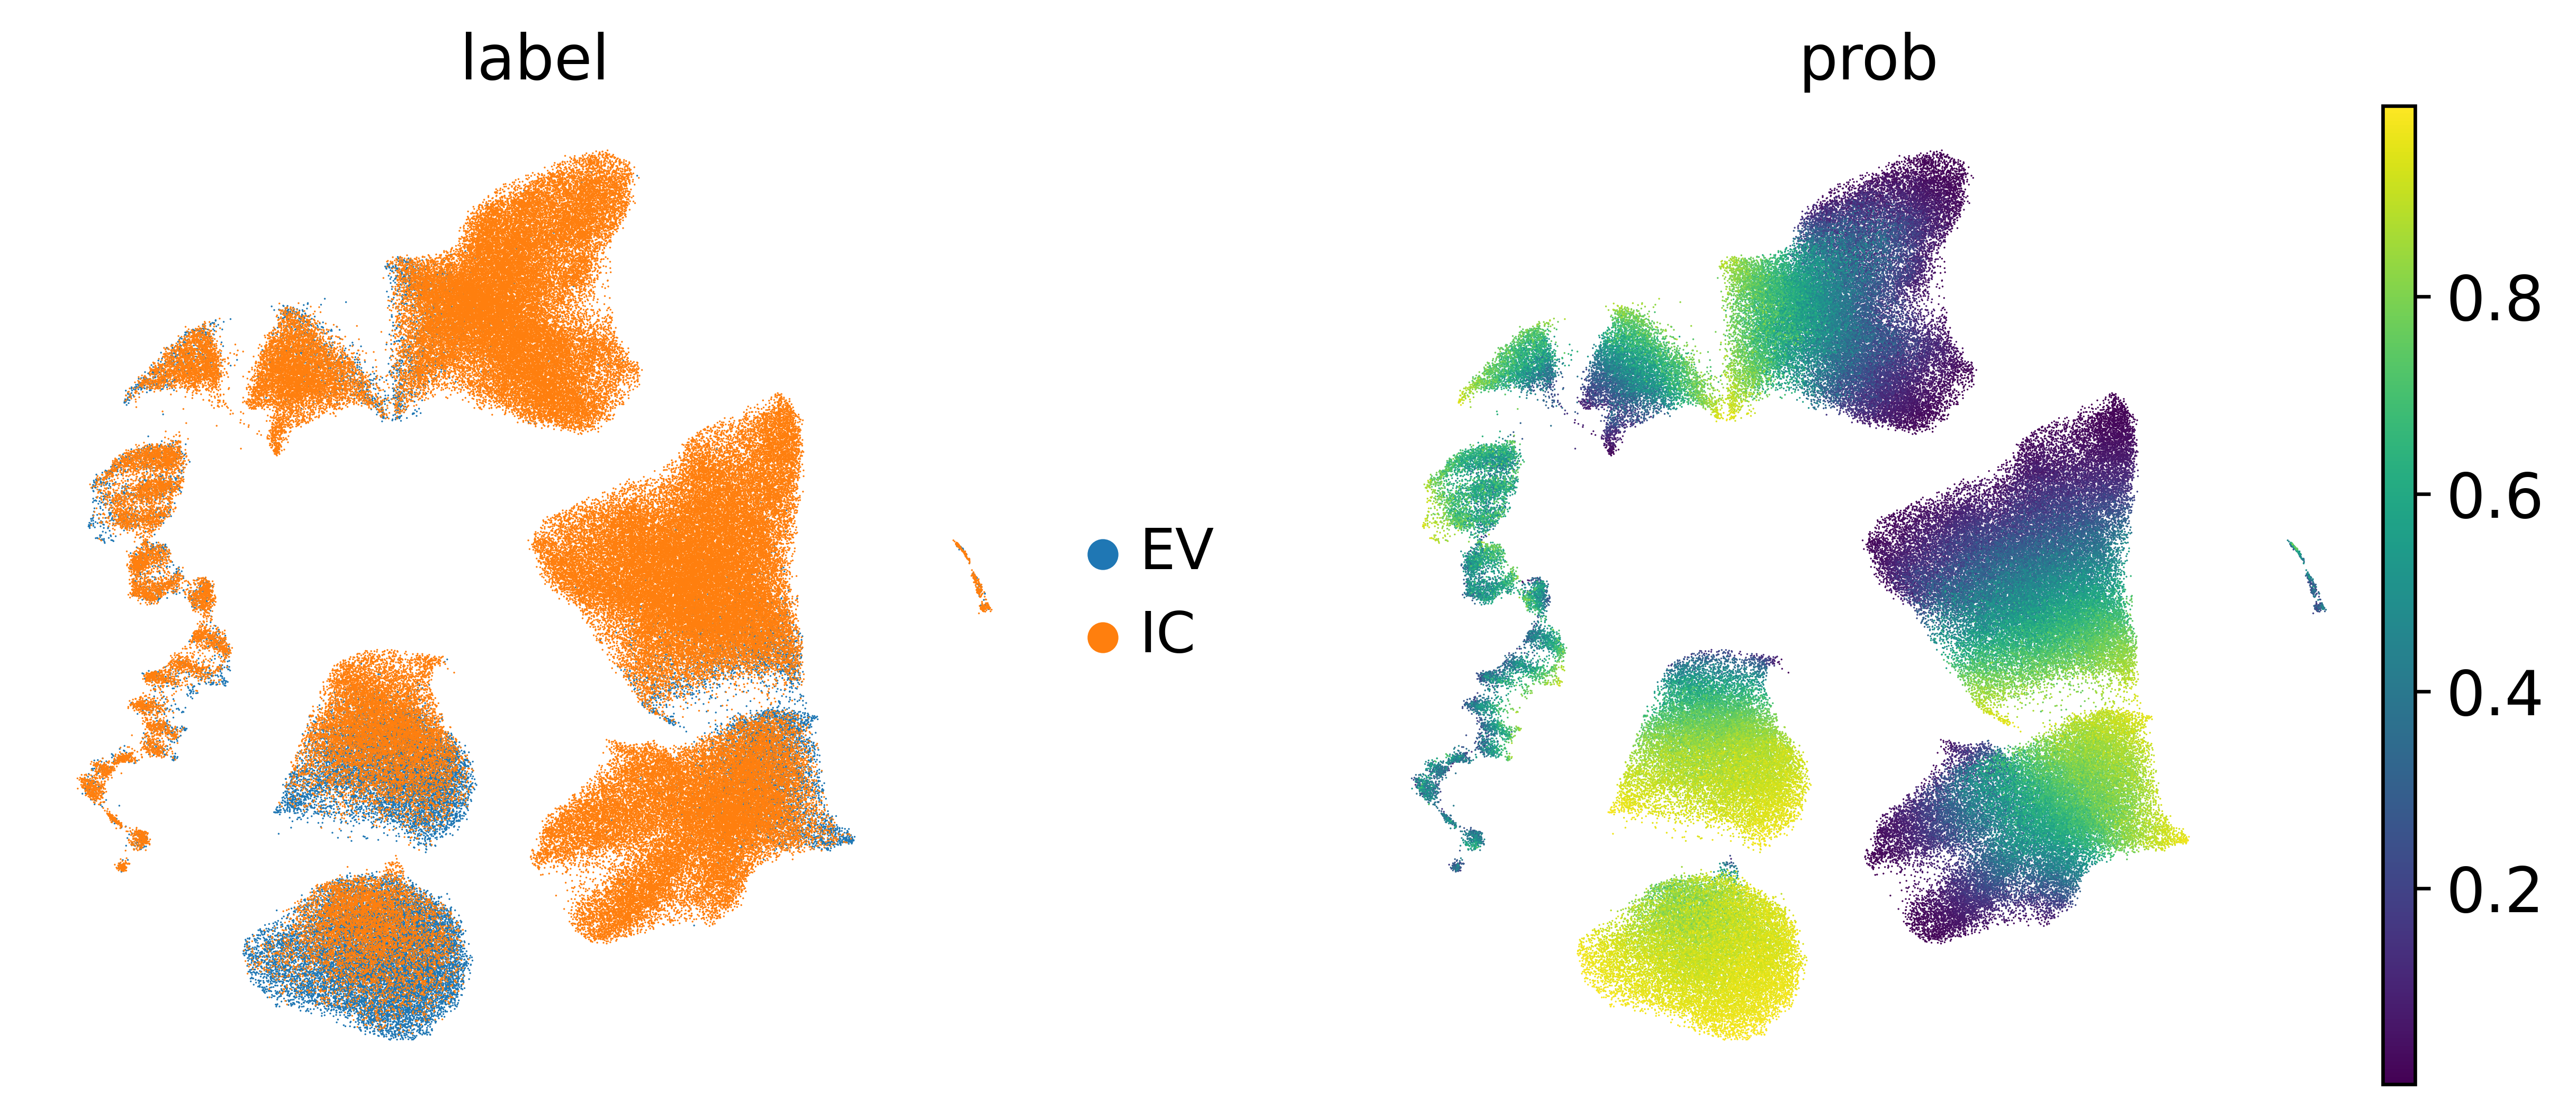

In [13]:
sc.pl.umap(emb_adata, color=['label', 'prob'], frameon=False)